In [1]:
import numpy as np
from scipy.linalg import logm, expm
import matplotlib.pyplot as plt

theta = -np.pi/32
R = np.identity(3)
R[0, :] = np.cos(theta), np.sin(theta), 0
R[1, :] = -np.sin(theta), np.cos(theta), 0
R[2, :] = 0, 0, 1
a = np.array([[1], [0], [0]]) # position of origin frame a in reference frame b
T0 = np.c_[R,a]
T0 = np.r_[T0,np.array([[0,0,0,1]])]
print(T0)

transforms = [np.array(T0) for _ in range(10)]
transforms[2][0,3]+=0.3
transforms[2][1,3]-=0.3
transforms[5][0,3]+=0.2
transforms[5][1,3]-=0.4
transforms[7][0,3]+=0.1
transforms[7][1,3]-=0.1
T_world = [np.identity(4)]

for i in range(1, len(transforms)):
    T_world.append(np.matmul(T_world[i-1],transforms[i]))

omegas = []
for i in range(len(transforms)-1):
    omegas.append(logm(np.linalg.inv(T_world[i]) @ T_world[i + 1]))

[[ 0.99518473 -0.09801714  0.          1.        ]
 [ 0.09801714  0.99518473  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


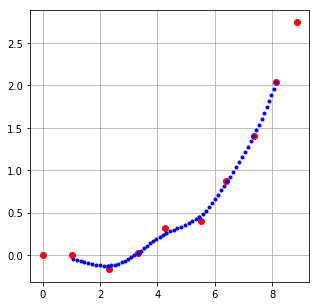

In [4]:
num_intervals = len(transforms) - 3
num_spline_points = 10
C = 1/6 * np.array([[6,0,0,0],[5,3,-3,1],[1,3,3,-2],[0,0,0,1]])
T_w_s = [[None for _ in range(num_intervals)] for _ in range(num_spline_points)]
s_i = np.linspace(0, len(transforms) - 1, len(transforms))
for i in range(num_intervals):
    s_t = np.linspace(i + 1, i + 2, num_spline_points)
    for t in range(num_spline_points):
        u = s_t[t] - s_i[i+1]
        u_vector = np.array([[1],[u],[u*u],[u*u*u]])
        B = np.matmul(C, u_vector)
        T_w_s[t][i] = T_world[i] @ expm(B[1] * omegas[i]) @ expm(B[2] * omegas[i+1]) @ expm(B[3] * omegas[i+2])

plt.figure(figsize=(5,5))
for i in range(len(transforms)):
    plt.plot(T_world[i][0,3],T_world[i][1,3],'ro')

for i in range(len(T_w_s)):
    for j in range(num_intervals):
        plt.plot(T_w_s[i][j][0,3],T_w_s[i][j][1,3],'b.')
    
plt.grid()

In [6]:
len(T_w_s[0])

7